# Import de libs

In [79]:
import IPython.display as ipd
import numpy as np
import pandas as pd
from IPython.display import Audio
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import pickle

# Gerando arquivos das imagens

In [80]:
i = 0

files = []

for dirname, _, filenames in os.walk('extended-cohn-kanade-images'):
    for filename in filenames:
        
        files.append(os.path.join(dirname, filename))
        
        if(i<5):
            print(os.path.join(dirname, filename))
        else:
            pass
            
        i = i + 1

extended-cohn-kanade-images\cohn-kanade-images\S005\.DS_Store
extended-cohn-kanade-images\cohn-kanade-images\S005\001\S005_001_00000001.png
extended-cohn-kanade-images\cohn-kanade-images\S005\001\S005_001_00000002.png
extended-cohn-kanade-images\cohn-kanade-images\S005\001\S005_001_00000003.png
extended-cohn-kanade-images\cohn-kanade-images\S005\001\S005_001_00000004.png


In [81]:
len(files)

10727

# Checando arquivos que não são imagens e retirando elas

In [82]:
for file in files:
    if(file[-3:] != 'png'):
        files.remove(file)
        print(file)

extended-cohn-kanade-images\cohn-kanade-images\S005\.DS_Store
extended-cohn-kanade-images\cohn-kanade-images\S053\.DS_Store
extended-cohn-kanade-images\cohn-kanade-images\S084\.DS_Store
extended-cohn-kanade-images\cohn-kanade-images\S084\004\.DS_Store
extended-cohn-kanade-images\cohn-kanade-images\S094\.DS_Store
extended-cohn-kanade-images\cohn-kanade-images\S103\.DS_Store
extended-cohn-kanade-images\cohn-kanade-images\S108\.DS_Store
extended-cohn-kanade-images\cohn-kanade-images\S121\.DS_Store
extended-cohn-kanade-images\cohn-kanade-images\S122\.DS_Store
extended-cohn-kanade-images\cohn-kanade-images\S126\002\.DS_Store
extended-cohn-kanade-images\cohn-kanade-images\S128\001\.DS_Store
extended-cohn-kanade-images\cohn-kanade-images\S128\003\.DS_Store
extended-cohn-kanade-images\cohn-kanade-images\S128\005\.DS_Store
extended-cohn-kanade-images\cohn-kanade-images\S129\001\.DS_Store
extended-cohn-kanade-images\cohn-kanade-images\S129\003\.DS_Store
extended-cohn-kanade-images\cohn-kanade-im

In [83]:
files[1].split("\\")

['extended-cohn-kanade-images',
 'cohn-kanade-images',
 'S005',
 '001',
 'S005_001_00000002.png']

In [84]:
# Função para pegar a chave 

def get_key(files):
    
    files_vet = files.copy()
    
    keys = []
    
    for i in range(len(files_vet)):
        splitted = files_vet[i].split('\\')
        keys.append(splitted[2] + splitted[3])
    
    return keys

In [85]:
get_key(files)[:5]

['S005001', 'S005001', 'S005001', 'S005001', 'S005001']

In [86]:
# Gerando dataframe de diretórios de imagens

base = pd.DataFrame()
base['dir'] = files
base['key_img'] = get_key(files)

print(base.shape)
base.head()

(10708, 2)


,dir,key_img
0,extended-cohn-kanade-images\cohn-kanade-images...,S005001
1,extended-cohn-kanade-images\cohn-kanade-images...,S005001
2,extended-cohn-kanade-images\cohn-kanade-images...,S005001
3,extended-cohn-kanade-images\cohn-kanade-images...,S005001
4,extended-cohn-kanade-images\cohn-kanade-images...,S005001


In [87]:
# Vetor que será nossa coluna de qual frame do vídeo é, utilizaremos que as 4 primeiras são neutras e as demais são da emoção
# simulada
isneutral = []
for i in range(base.shape[0]):
    isneutral.append(int(base['dir'].values[i][-6:-4]))

In [88]:
base['frame'] = isneutral
base.head()

,dir,key_img,frame
0,extended-cohn-kanade-images\cohn-kanade-images...,S005001,1
1,extended-cohn-kanade-images\cohn-kanade-images...,S005001,2
2,extended-cohn-kanade-images\cohn-kanade-images...,S005001,3
3,extended-cohn-kanade-images\cohn-kanade-images...,S005001,4
4,extended-cohn-kanade-images\cohn-kanade-images...,S005001,5


In [89]:
base.isnull().sum()

dir        0
key_img    0
frame      0
dtype: int64

# Pegando os labels

In [90]:
i = 0

labels = []
chave = []

for dirname, _, filenames in os.walk('Emotion_labels'):
    for filename in filenames:
        f = open(os.path.join(dirname, filename), "r")
        labels.append(f.read().replace('\n', '').replace(' ', ''))
        chave.append(os.path.join(dirname, filename))
        
        if(i<5):
            print(os.path.join(dirname, filename))
        else:
            pass
            
        i = i + 1

Emotion_labels\Emotion\S005\001\S005_001_00000011_emotion.txt
Emotion_labels\Emotion\S010\002\S010_002_00000014_emotion.txt
Emotion_labels\Emotion\S010\004\S010_004_00000019_emotion.txt
Emotion_labels\Emotion\S010\006\S010_006_00000015_emotion.txt
Emotion_labels\Emotion\S011\001\S011_001_00000016_emotion.txt


In [91]:
labels[0].split("\\")

['3.0000000e+00']

In [92]:
chave[:][2:4]

['Emotion_labels\\Emotion\\S010\\004\\S010_004_00000019_emotion.txt',
 'Emotion_labels\\Emotion\\S010\\006\\S010_006_00000015_emotion.txt']

In [93]:
labels = [int(float(l)) for l in labels]
labels[:5]

[3, 7, 1, 5, 7]

In [94]:
len(labels)

327

In [95]:
len(chave)

327

In [96]:
get_key(chave)[:5]

['S005001', 'S010002', 'S010004', 'S010006', 'S011001']

In [97]:
def map_labels(label):
    if label == 0:
        return 'neutral'
    elif label == 1:
        return 'anger'
    elif label ==2:
        return 'contempt'
    elif label == 3:
        return 'disgust'
    elif label == 4:
        return 'fear'
    elif label == 5:
        return 'happy'
    elif label == 6:
        return 'sadness'
    elif label == 7:
        return 'surprise'
    else:
        return 'null'
    
def map_reduced_labels(label):
    if((label == 0)):
        return 0
    elif((label == 1)|(label == 2)|(label == 3)|(label == 4)|(label == 6)):
        return -1
    elif((label == 5)):
        return 1
    else:
        return -99

In [98]:
# Gerando dataframe de labels

lbl = pd.DataFrame()

lbl['dir_lbl'] = chave
lbl['label'] = labels
lbl['cat_labels'] = lbl['label'].map(map_labels)
lbl['reduced_labels'] = lbl['label'].map(map_reduced_labels)
lbl['key_img'] = get_key(chave)

print(lbl.shape)
lbl.head()

(327, 5)


,dir_lbl,label,cat_labels,reduced_labels,key_img
0,Emotion_labels\Emotion\S005\001\S005_001_00000...,3,disgust,-1,S005001
1,Emotion_labels\Emotion\S010\002\S010_002_00000...,7,surprise,-99,S010002
2,Emotion_labels\Emotion\S010\004\S010_004_00000...,1,anger,-1,S010004
3,Emotion_labels\Emotion\S010\006\S010_006_00000...,5,happy,1,S010006
4,Emotion_labels\Emotion\S011\001\S011_001_00000...,7,surprise,-99,S011001


In [99]:
lbl.isnull().sum()

dir_lbl           0
label             0
cat_labels        0
reduced_labels    0
key_img           0
dtype: int64

# Trazendo as labels para a base de diretório de imagens

In [100]:
base_full = base.merge(lbl, how='left', on = 'key_img')

In [101]:
base_full.head()

,dir,key_img,frame,dir_lbl,label,cat_labels,reduced_labels
0,extended-cohn-kanade-images\cohn-kanade-images...,S005001,1,Emotion_labels\Emotion\S005\001\S005_001_00000...,3.0,disgust,-1.0
1,extended-cohn-kanade-images\cohn-kanade-images...,S005001,2,Emotion_labels\Emotion\S005\001\S005_001_00000...,3.0,disgust,-1.0
2,extended-cohn-kanade-images\cohn-kanade-images...,S005001,3,Emotion_labels\Emotion\S005\001\S005_001_00000...,3.0,disgust,-1.0
3,extended-cohn-kanade-images\cohn-kanade-images...,S005001,4,Emotion_labels\Emotion\S005\001\S005_001_00000...,3.0,disgust,-1.0
4,extended-cohn-kanade-images\cohn-kanade-images...,S005001,5,Emotion_labels\Emotion\S005\001\S005_001_00000...,3.0,disgust,-1.0


In [102]:
base_full.isnull().sum()

dir                  0
key_img              0
frame                0
dir_lbl           4832
label             4832
cat_labels        4832
reduced_labels    4832
dtype: int64

In [103]:
base_clean = base_full.dropna()

In [104]:
base_clean.isnull().sum()

dir               0
key_img           0
frame             0
dir_lbl           0
label             0
cat_labels        0
reduced_labels    0
dtype: int64

# Correção das emoções neutras

* **A base clean utilizamos os 4 primeiros frames como neutros**
* **A base clean V2 utilizamos somente 3**

In [105]:
# Função que transforma a label das primeiras imagens das sequencias como neutras

# A base clean utilizamos os 4 primeiros frames como neutros
# A base clean V2 utilizamos somente 3

base_clean.loc[base_clean['frame'].isin([1,2,3]) , 'label'] = 0

In [106]:
base_clean['cat_labels'] = base_clean['label'].map(map_labels)
base_clean['reduced_labels'] = base_clean['label'].map(map_reduced_labels)
base_clean.head()

c:\users\lucas\anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\lucas\anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,dir,key_img,frame,dir_lbl,label,cat_labels,reduced_labels
0,extended-cohn-kanade-images\cohn-kanade-images...,S005001,1,Emotion_labels\Emotion\S005\001\S005_001_00000...,0.0,neutral,0
1,extended-cohn-kanade-images\cohn-kanade-images...,S005001,2,Emotion_labels\Emotion\S005\001\S005_001_00000...,0.0,neutral,0
2,extended-cohn-kanade-images\cohn-kanade-images...,S005001,3,Emotion_labels\Emotion\S005\001\S005_001_00000...,0.0,neutral,0
3,extended-cohn-kanade-images\cohn-kanade-images...,S005001,4,Emotion_labels\Emotion\S005\001\S005_001_00000...,3.0,disgust,-1
4,extended-cohn-kanade-images\cohn-kanade-images...,S005001,5,Emotion_labels\Emotion\S005\001\S005_001_00000...,3.0,disgust,-1


# Algumas estatísitcas da base

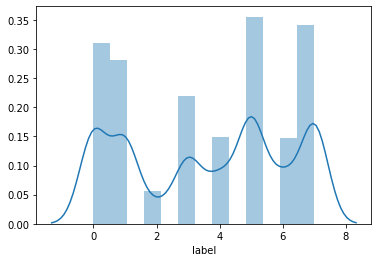

In [107]:
sns.distplot(base_clean['label'])

In [108]:
agg1 = base_clean.groupby('cat_labels').agg({'dir':'count'}).reset_index().rename(columns={'dir':'count'})
agg1

,cat_labels,count
0,anger,887
1,contempt,179
2,disgust,691
3,fear,471
4,happy,1124
5,neutral,981
6,sadness,463
7,surprise,1080


In [109]:
agg2 = base_clean.groupby('reduced_labels').agg({'dir':'count'}).reset_index().rename(columns={'dir':'count'})
agg2

,reduced_labels,count
0,-99,1080
1,-1,2691
2,0,981
3,1,1124


# Testando algumas imagens

In [140]:
i = 87

path = base_clean['dir'].values[i]
img1 = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

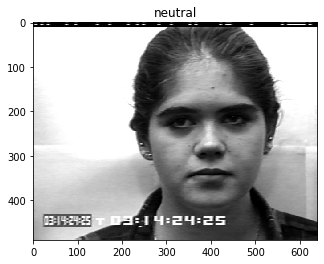

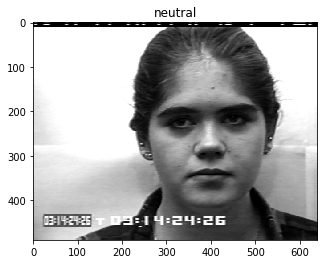

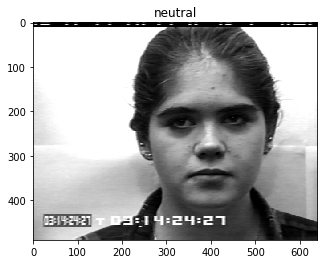

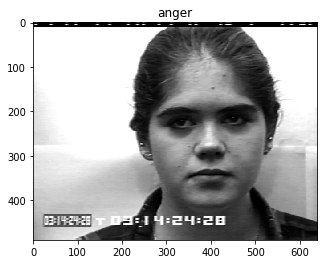

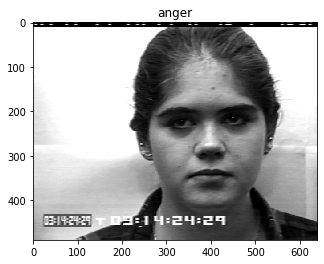

In [141]:
label = base_clean['cat_labels'].values[i]
plt.title(label)
plt.imshow(img1)
plt.show()


label = base_clean['cat_labels'].values[i+1]
path = base_clean['dir'].values[i+1]
img1 = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

plt.title(label)
plt.imshow(img1)
plt.show()

label = base_clean['cat_labels'].values[i+2]
path = base_clean['dir'].values[i+2]
img1 = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

plt.title(label)
plt.imshow(img1)
plt.show()

label = base_clean['cat_labels'].values[i+3]
path = base_clean['dir'].values[i+3]
img1 = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

plt.title(label)
plt.imshow(img1)
plt.show()

label = base_clean['cat_labels'].values[i+4]
path = base_clean['dir'].values[i+4]
img1 = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

plt.title(label)
plt.imshow(img1)
plt.show()

In [133]:
# Eliminando a emção "Surprise"
base_clean = base_clean[base_clean['reduced_labels']!= -99]

In [114]:
base_clean.to_csv("base_clean_v2.csv", index=  False)

In [115]:
base_clean.shape

(4796, 7)

In [116]:
base_full.shape

(10708, 7)